## Keras API

Fork from https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/03C_Keras_API.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

/home/kchen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

In [3]:
tf.__version__

'1.5.0'

In [4]:
tf.keras.__version__

'2.1.2-tf'

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [11]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [6]:
img_size = 28

img_size_flat = img_size * img_size

img_shape = (img_size, img_size)

num_channels = 1

img_shape_full = (img_size, img_size, num_channels)

num_classes = 10

In [9]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

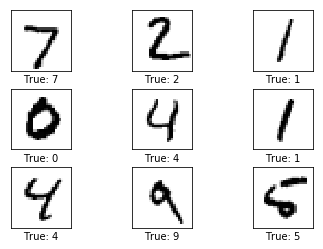

In [12]:

images = data.test.images[0:9]

cls_true = data.test.cls[0:9]

plot_images(images=images, cls_true=cls_true)


In [13]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != data.test.cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [14]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=(img_size_flat,)))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape(img_shape_full))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# First fully-connected / dense layer with ReLU-activation.
model.add(Dense(128, activation='relu'))

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(num_classes, activation='softmax'))

In [15]:
from tensorflow.python.keras.optimizers import Adam

optimizer = Adam(lr=1e-3)

In [16]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
model.fit(x=data.train.images,
          y=data.train.labels,
          epochs=1, batch_size=128)

Epoch 1/1
55000/55000 [==============================]55000/55000 [==============================] - 70s 1ms/step - loss: 0.2213 - acc: 0.9338



In [19]:
result = model.evaluate(x=data.test.images,
                        y=data.test.labels)

10000/10000 [==============================]10000/10000 [==============================] - 5s 494us/step



In [20]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.056985650842171165
acc 0.9813


In [21]:
print("{0}: {1:.2%}".format(model.metrics_names[1], result[1]))

acc: 98.13%


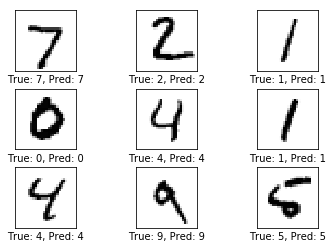

In [22]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
y_pred = model.predict(x=images)
cls_pred = np.argmax(y_pred,axis=1)
plot_images(images=images,
            cls_true=cls_true,
            cls_pred=cls_pred)

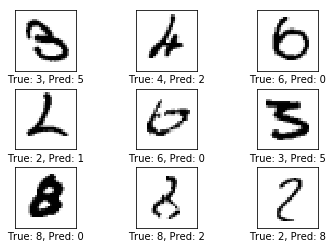

In [23]:
y_pred = model.predict(x=data.test.images)
cls_pred = np.argmax(y_pred,axis=1)
plot_example_errors(cls_pred)

In [24]:
# Create an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
inputs = Input(shape=(img_size_flat,))

# Variable used for building the Neural Network.
net = inputs

# The input is an image as a flattened array with 784 elements.
# But the convolutional layers expect images with shape (28, 28, 1)
net = Reshape(img_shape_full)(net)

# First convolutional layer with ReLU-activation and max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
             activation='relu', name='layer_conv1')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# Second convolutional layer with ReLU-activation and max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
             activation='relu', name='layer_conv2')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# Flatten the output of the conv-layer from 4-dim to 2-dim.
net = Flatten()(net)

# First fully-connected / dense layer with ReLU-activation.
net = Dense(128, activation='relu')(net)

# Last fully-connected / dense layer with softmax-activation
# so it can be used for classification.
net = Dense(num_classes, activation='softmax')(net)

# Output of the Neural Network.
outputs = net

In [25]:
from tensorflow.python.keras.models import Model

model2 = Model(inputs=inputs, outputs=outputs)

model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [26]:
model2.fit(x=data.train.images,
           y=data.train.labels,
           epochs=1, batch_size=128)

Epoch 1/1
55000/55000 [==============================]55000/55000 [==============================] - 68s 1ms/step - loss: 0.2039 - acc: 0.9365



In [28]:
result = model2.evaluate(x=data.test.images,
                         y=data.test.labels)
print(result)

10000/10000 [==============================]10000/10000 [==============================] - 5s 489us/step

[0.08439161134334282, 0.9727]


In [29]:
for name, value in zip(model2.metrics_names, result):
    print(name, value)

loss 0.08439161134334282
acc 0.9727


In [30]:
print("{0}: {1:.2%}".format(model2.metrics_names[1], result[1]))

acc: 97.27%


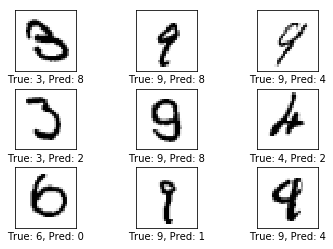

In [31]:
y_pred = model2.predict(x=data.test.images)
cls_pred = np.argmax(y_pred, axis=1)
plot_example_errors(cls_pred)

In [32]:
path_model = 'model.keras'
model2.save(path_model)
del model2

In [33]:
from tensorflow.python.keras.models import load_model
model3 = load_model(path_model)

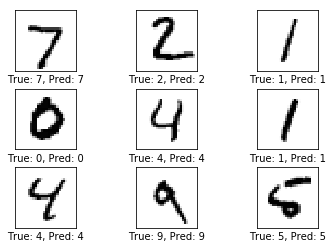

In [34]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]

y_pred = model3.predict(x=images)
cls_pred = np.argmax(y_pred, axis=1)

plot_images(images=images,
            cls_pred=cls_pred,
            cls_true=cls_true)

In [35]:
def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [36]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
__________

In [37]:
layer_input = model3.layers[0]
print(layer_input)

In [38]:
layer_conv1 = model3.layers[2]
layer_conv1

In [39]:
layer_conv2 = model3.layers[4]
layer_conv2

In [40]:
weights_conv1 = layer_conv1.get_weights()[0]

In [41]:
weights_conv1.shape

(5, 5, 1, 16)

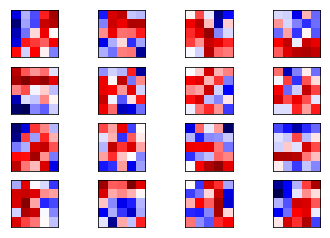

In [42]:
plot_conv_weights(weights=weights_conv1, input_channel=0)

In [43]:
weights_conv2 = layer_conv2.get_weights()[0]

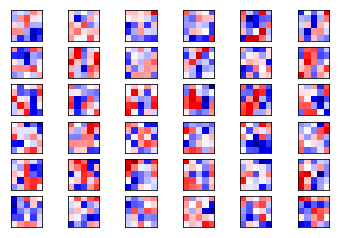

In [44]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

## Exercises

- Train for more epochs. Does it improve the classification accuracy?
- Change the activation function to sigmoid for some of the layers.
- Can you find a simple way of changing the activation function for all the layers?
- Plot the output of the max-pooling layers instead of the conv-layers.
- Replace the 2x2 max-pooling layers with stride=2 in the convolutional layers. Is there a difference in classification accuracy? What if you optimize it again and again? The difference is random, so how would you measure if there really is a difference? What are the pros and cons of using max-pooling vs. stride in the conv-layer?
- Change the parameters for the layers, e.g. the kernel, depth, size, etc. What is the difference in time usage and classification accuracy?
- Add and remove some convolutional and fully-connected layers.
- What is the simplest network you can design that still performs well?
- Change the Functional Model so it has another convolutional layer that connects in parallel to the existing conv-layers before going into the dense layers.
- Change the Functional Model so it outputs the predicted class both as a One-Hot encoded array and as an integer, so we don't have to use numpy.argmax() afterwards.
- Remake the program yourself without looking too much at this source-code.
- Explain to a friend how the program works.